## **A. DATA PREPARATION**

#### **1. Data Load**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sample_data/Telco-Customer-Churn.csv")

Telco is a mid-sized telecommunications company based in the USA. It provides digital services such as internet, phone, security, and streaming, and operates with a monthly billing system.

However, in recent months, the management has noticed that:

- Hundreds of customers are cancelling their subscriptions every month.
- Some of them had only subscribed a few months ago!

The management took the issue seriously and requested support from the data science team to prevent customer loss and develop effective strategies.

### Variable Explanation :
**customerID:**	Unique identifier assigned to each customer   
**gender:** Gender of the customer: Male or Female      
**SeniorCitizen:** Indicates if the customer is a senior citizen (0: No, 1: Yes)                                                                         
**Partner:**  Whether the customer has a spouse or partner (Yes/No)   
**Dependents:** Whether the customer has dependents (Yes/No)    
**tenure:**	Number of months the customer has stayed with the company   
**PhoneService:** Whether the customer has phone service (Yes/No)   
**MultipleLines:**  Whether the customer has multiple phone lines (Yes/No/No phone service)           
**InternetService:**  DSL, Fiber optic, or None    
**OnlineSecurity:** Whether the customer has online security service (Yes/No/No internet service)       
**OnlineBackup:**  Whether the customer has online backup service (Yes/No/No internet service)     
**DeviceProtection:** Whether the customer has device protection service (Yes/No/No internet service)       
**TechSupport:**  Whether the customer has technical support service (Yes/No/No internet service)       
**StreamingTV:**  Whether the customer uses streaming TV service (Yes/No/No internet service)       
**StreamingMovies:**	Whether the customer uses streaming movies service (Yes/No/No internet service)       
**Contract:**	Type of contract, Month-to-month, One year, or Two year
PaperlessBilling	Whether the customer uses paperless billing (Yes/No)        
**PaymentMethod:**	Payment method: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)      
**MonthlyCharges:**	Monthly bill amount     
**TotalCharges:**	Total charges accumulated since the customer joined     
**Churn:**	Has the customer left the company? (Yes: Churned, No: Retained) 🎯 Target variable


#### **2. Initial Data Analyze**
In this section, we’ll explore the dataset using basic descriptive statistics

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Take a look at the basic statistics :
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### **3. Data Type Transformation**

As we can see above, the data type of TotalCharges is not appropriate for the values it contains. Despite the column containing numeric values, the data type is object. That's why the feature should be converted to a numeric data type such as float.

In [ ]:
# First, spaces were replaced with NaN values. That helped us convert the TotalCharges feature to the correct data type.
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [ ]:
# Now, the TotalCharges feature can be converted properly.

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
# We are checking if the data type of TotalCharges is appropriate.
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
# The Churn feature contains Yes/No boolean values. Hence, we must convert them into 1/0.
# This allows for better model implementation.

df['Churn'] = (df['Churn'] == 'Yes').astype(int)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### **4. Null Value Control**

In [ ]:
# After converting the data type, we observed some null values in the TotalCharges feature.

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# These customers are probably newly subscribed, which is why we do not yet have enough insight about them.
# In addition, this data do not contribute effectively to the model.
df[df['TotalCharges'].isnull()][['TotalCharges','tenure']]

,TotalCharges,tenure
488,NaN,0
753,NaN,0
936,NaN,0
1082,NaN,0
1340,NaN,0
3331,NaN,0
3826,NaN,0
4380,NaN,0
5218,NaN,0
6670,NaN,0


In [ ]:
# Therefore, we decided to drop these records before training the model.

df = df.dropna(subset=['TotalCharges'])
df[df['TotalCharges'].isnull()][['TotalCharges','tenure']]

,TotalCharges,tenure


#### **5. Why Don't We Detect Outliers**

Outlier detection was considered, but not applied in this case. Since this is a classification problem with a categorical target variable (`Churn`), the presence of extreme values in numeric features (such as `MonthlyCharges` or `TotalCharges`) may reflect real customer behaviors rather than data entry errors.

In churn analysis, unusual or extreme patterns are often meaningful. For example, a very high-paying customer who cancels early might indicate a serious service issue — removing such data would risk losing valuable insights.

Therefore, unless there are clear data entry errors (e.g., `TotalCharges = 0` with `tenure > 10`), we retain the full range of values and allow the model to learn from such variations.


#### **6. Data Analyze with Visualizations**

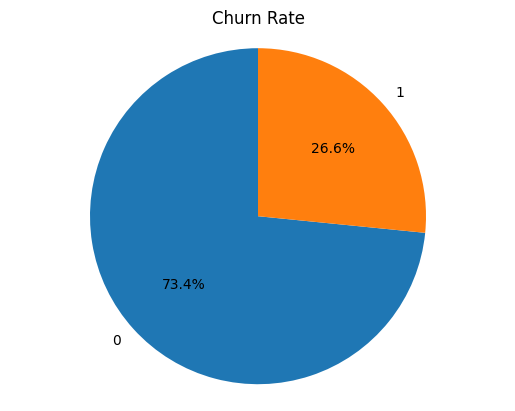

In [ ]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate')
plt.axis('equal')
plt.show()

**Figure Explanation:**
- The pie chart shows that 26.6% of customers have cancelled their subscriptions, while 73.4% are still subscribed. That shows us the data is not evenly distributed.

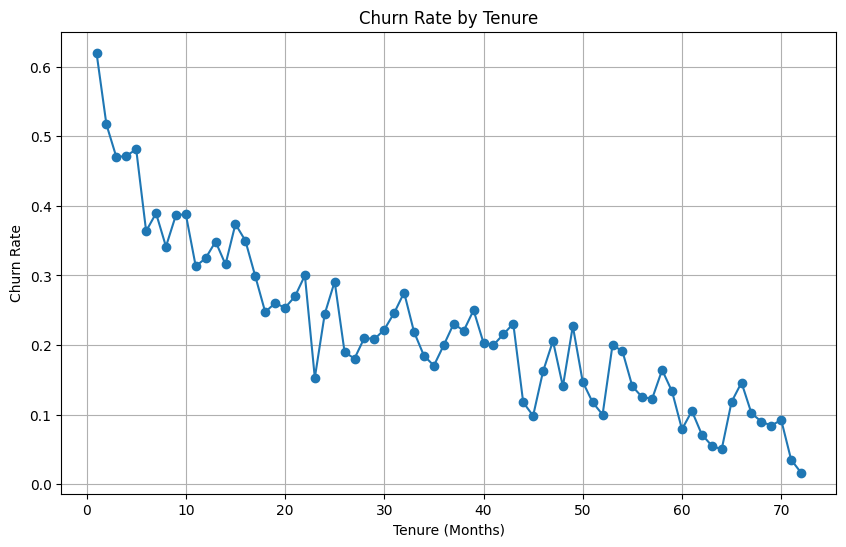

In [ ]:
tenure_churn = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(tenure_churn[1], marker='o')  # 👈 Focus only on churned customers
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

**Figure Explanation:**
- The churn rate is significantly high in the first 2–3 months, which indicates that new customers are more likely to cancel their subscriptions.
- Furthermore, while the churn rate decreases, tenure gradually increases. This proves that long-term customers are more loyal than short-term ones.

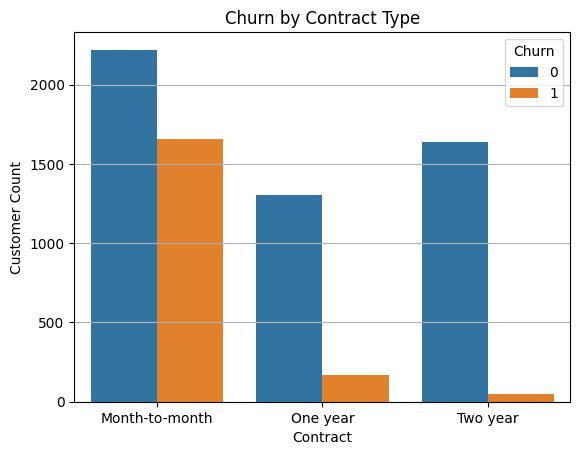

In [ ]:
# We can also check churn by contract type to see whether contract duration has an effect on customer churn.
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.ylabel('Customer Count')
plt.grid(axis='y')
plt.show()


**Figure Explanation:**
- We can also observe from the plot that long-term customers are more loyal. This finding supports the insight from the previous figure.

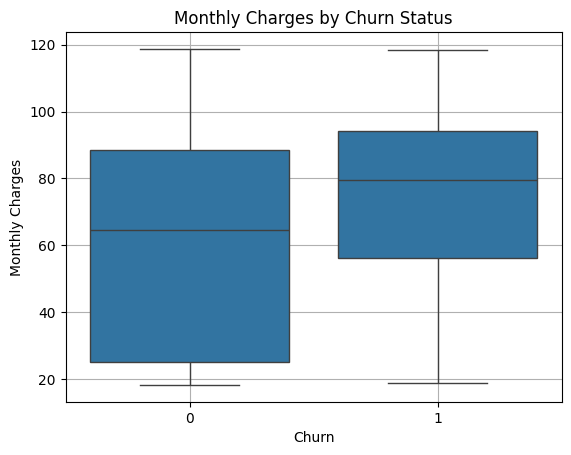

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()


**Figure Explanation:**
- The median value for churned customers is higher than that of non-churned customers. This suggests that churned customers pay more than others.
- In addition, we can observe that the box for churned customers is narrower than that of non-churned customers. This suggests that churned customers do not have a wide range of payment amounts, unlike non-churned customers who exhibit more variation in their payments.
- Limited payment variation may have had an impact on customers, leading them to cancel their subscriptions.

#### **7. Feature Engineering**

In [ ]:
# Adding new feature called AvgMonthlySpend. This feature shows us average spend.

df.loc[:, 'AvgMonthlySpend'] = round(df['TotalCharges'] / df['tenure'].replace(0, np.nan),2)

In [ ]:
# The customers stayed subscribed more tahan 2 years.

df.loc[:, 'LongTermCustomer'] = (df['tenure'] >= 24).astype(int)

In [ ]:
# Customers who purchase more services are likely to be more loyal.
# That's why we created the ServiceCount feature.
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df.loc[:, 'ServiceCount'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)


In [ ]:
# Month-to-month payers can be risky customers who are more likely to cancel their subscriptions.
df.loc[:, 'IsMonthToMonth'] = (df['Contract'] == 'Month-to-month').astype(int)


In [ ]:
# These customers have subscribed to more than one service.
# This type of customer may be more loyal than those who subscribe to only one service.

df.loc[:, 'FullBundle'] = ((df['PhoneService'] == 'Yes') &
                    (df['InternetService'] != 'No') &
                    (df['StreamingTV'] == 'Yes') &
                    (df['StreamingMovies'] == 'Yes')).astype(int)


In [ ]:
df.loc[:, 'gender'] = (df['gender'] == 'Male').astype(int)

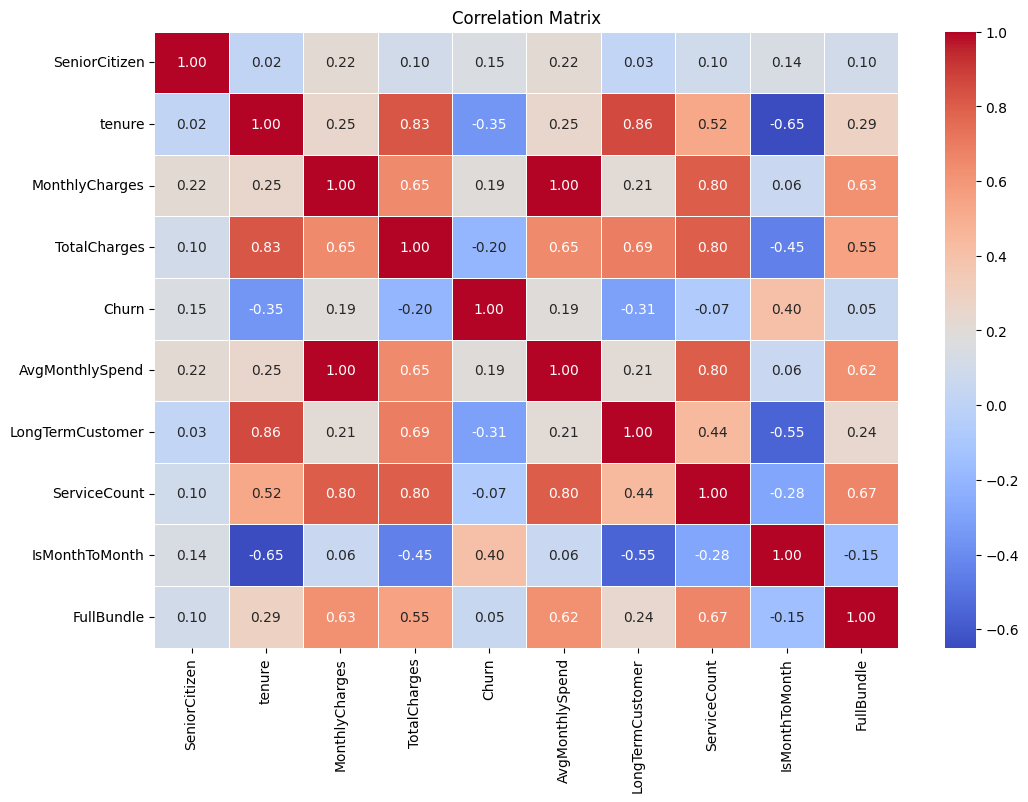

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Figure Explanation:** Correlation Matrix Insights
- It is clearly stated in the correlation matrix that :
  - **tenure :** -0.35; this indicates negative correlation between tenure and churn. It tells us that when tenure increases, churn decreases. In other words, the risk of churn becomes lower as customers stay longer.
  - **IsMonthToMonth :** 0.40; this indicates a positive correlation between IsMonthToMonth and Churn. It tells us that customers with month-to-month contracts are more likely to cancel their subscriptions.
  - **ServiceCount :** -0.07; this indicates weak correlation.Although minimal, it suggests that customers using more services may be slightly less likely to churn.
  - **LongTermCustomer :** -0.31; this indicates a negative correlation between LongTermCustomer and Churn. It reflects the same pattern as tenure: the longer a customer stays, the lower the risk of churn.
  - **TotalCharges :**  -0.20; this indicates a weak negative correlation between TotalCharges and Churn. It shows that the risk of churn becomes lower as customers pay more over time.
  - Despite these observations, the dependent variable **`Churn`** cannot be fully explained by linear relationships alone. Therefore, we should implement **non-linear machine learning models** such as **Decision Tree**, **Random Forest**, or **Gradient Boosting** to capture more complex interactions between features.

#### **8. Data Normailzation and Standardization**

Machine learning models are sensitive to the scale of numerical features. Therefore, before model training, we applied standardization to ensure all features contribute equally.

StandardScaler was used to transform features like `tenure`, `MonthlyCharges`, and `TotalCharges` to have a mean of 0 and a standard deviation of 1. This step improves convergence and prevents models from being biased toward features with larger ranges.

In [ ]:
# Before encoding, we examined the cardinality of categorical features using:

df.select_dtypes(include='object').nunique().sort_values()

# This helped us determine the proper encoding method.
# Features with two unique values were label encoded, while features with three or more categories were one-hot encoded or pd.get_dummies().


,0
gender,2
Partner,2
Dependents,2
PhoneService,2
PaperlessBilling,2
InternetService,3
OnlineSecurity,3
MultipleLines,3
StreamingTV,3
OnlineBackup,3


In [ ]:
# The `customerID` feature was removed from the dataset as it serves only as a unique identifier and provides no predictive value.
# Including such columns could introduce noise and potentially lead to overfitting.

df.drop('customerID', axis = 1, inplace = True)

In [ ]:
# We applied LabelEncoder to binary categorical features, as it is suitable for variables with only two possible values.
# For features with more than two categories, we avoided LabelEncoder because it creates an ordinal relationship that does not actually exist.

data_label_enc = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data_label_enc:
    df[col] = le.fit_transform(df[col].astype(str))

##### **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


##### **One-Hot Encoding and Standard-Scalar**

In [ ]:
data_std_scaler = ['tenure','MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:, data_std_scaler] = scaler.fit_transform(X_train[data_std_scaler])
X_test.loc[:, data_std_scaler] = scaler.transform(X_test[data_std_scaler])

<ipython-input-141-4792e56a498a>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.3218163  -0.26741023  1.4440645  ...  0.14008375 -0.9194006
 -1.28614519]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, data_std_scaler] = scaler.fit_transform(X_train[data_std_scaler])
<ipython-input-141-4792e56a498a>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.07731992 -1.0416488   0.87357292 ... -1.20464639  0.18083315
  0.71057533]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, data_std_scaler] = scaler.transform(X_test[data_std_scaler])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

data_one_hot = ['InternetService', 'OnlineSecurity', 'MultipleLines', 'StreamingTV', 'OnlineBackup', 'TechSupport', 'DeviceProtection', 'Contract', 'StreamingMovies', 'PaymentMethod']

# Encoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Train Dataset - fit + transform :
X_train_ohe_array = ohe.fit_transform(X_train[data_one_hot])
X_test_ohe_array = ohe.transform(X_test[data_one_hot])

# Taking the new column names :
ohe_columns = ohe.get_feature_names_out(data_one_hot)

# Convert to DataFrame and set indexes :
X_train_ohe_df = pd.DataFrame(X_train_ohe_array, columns=ohe_columns, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe_array, columns=ohe_columns, index=X_test.index)

# Drop the original categoric columns :
X_train.drop(columns=data_one_hot, inplace=True)
X_test.drop(columns=data_one_hot, inplace=True)

# Add the new encoded columns
X_train = pd.concat([X_train, X_train_ohe_df], axis=1)
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)


In [ ]:
# SMOTE : It is because of the dataset evenly distributed :

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("🔍 New Churn Distribution")
print(pd.Series(y_train_resampled).value_counts())

🔍 New Churn Distribution
Churn
0    4130
1    4130
Name: count, dtype: int64


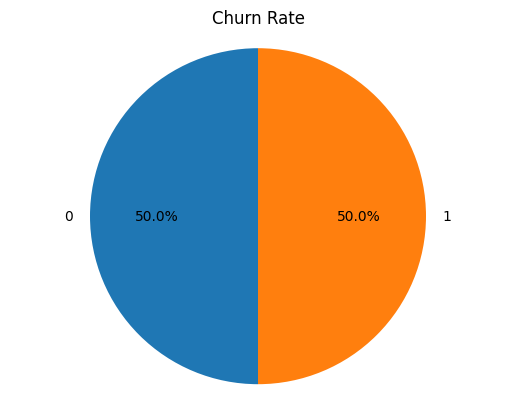

In [ ]:
# After SMOTE implemented, now our dataset is evenly distributed.

churn_counts = y_train_resampled.value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate')
plt.axis('equal')
plt.show()

## **B. MODELLING AND REVIEW**

#### **1. LogisticRegressionModel**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score
LogisticRegression_model=LogisticRegression(max_iter=10000)
LogisticRegression_model.fit(X_train,y_train)
y_pred=LogisticRegression_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score
LogisticRegression_model=LogisticRegression(max_iter=10000)
LogisticRegression_model.fit(X_train_resampled,y_train_resampled)
y_pred=LogisticRegression_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.74      0.75      1407



#### **2. KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train_resampled,y_train_resampled)
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1033
           1       0.46      0.72      0.56       374

    accuracy                           0.71      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.76      0.71      0.72      1407



#### **3. DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1033
           1       0.46      0.47      0.47       374

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train_resampled,y_train_resampled)
y_pred=dt_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1033
           1       0.48      0.56      0.52       374

    accuracy                           0.72      1407
   macro avg       0.66      0.67      0.66      1407
weighted avg       0.74      0.72      0.73      1407



#### **4. RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train_resampled,y_train_resampled)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.61      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407



#### **5. XgboostClassifier**

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1033
           1       0.55      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1033
           1       0.55      0.60      0.57       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.77      1407



#### **6. LgbmClassifier**

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = lgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1979
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.57      0.63      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



#### **7. General Owerview**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Models selected to use :
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Result Table :
results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1-Score": round(f1_score(y_test, y_pred), 3),
        "ROC AUC": round(roc_auc_score(y_test, y_proba), 3)
    })

# Shows as DataFrame :

import pandas as pd
results_df = pd.DataFrame(results).sort_values("ROC AUC", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
4,Gradient Boosting,0.763,0.543,0.695,0.610,0.829
0,Logistic Regression,0.740,0.507,0.738,0.601,0.823
3,Random Forest,0.762,0.548,0.591,0.569,0.810
1,KNN Classifier,0.705,0.464,0.717,0.564,0.774
2,Decision Tree,0.732,0.497,0.602,0.544,0.690


## **C. FEATURE IMPORTANCE**

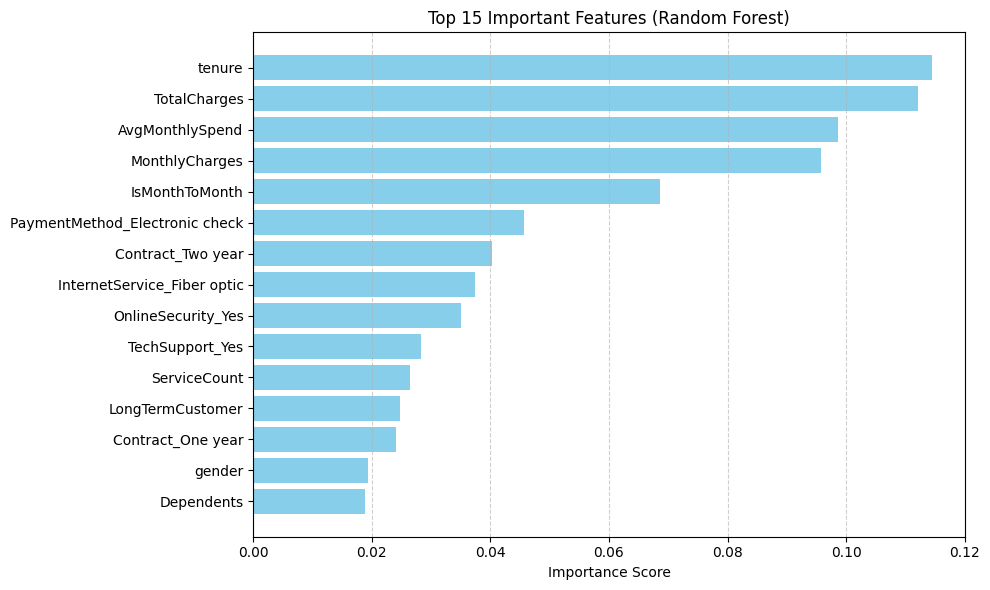

In [ ]:
# Modelden importance değerlerini al
model = models["Random Forest"]
importances = model.feature_importances_

# DataFrame'e dök
feat_imp_df = pd.DataFrame({
    "Feature": X_train_resampled.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# İlk 15 özelliği görselleştir
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"].head(15), feat_imp_df["Importance"].head(15), color="skyblue")
plt.xlabel("Importance Score")
plt.title("Top 15 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
